                                                        Handwritten digits classification using CNN
In this notebook we will classify handwritten digits using a simple neural network(ANN) first and than repeat same thing with convolutional neural network. We will see how accuracy improves clickly when you use convolutional neural network


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

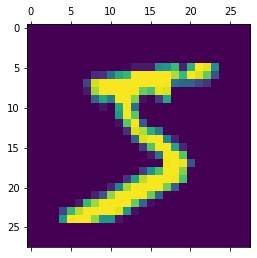

In [10]:
plt.matshow(X_train[0])

In [22]:
X_train = X_train / 255
X_test = X_test / 255

In [25]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_train.shape

(60000, 28, 28, 1)

In [26]:
X_test = X_test.reshape(-1, 28, 28, 1)
X_test.shape

(10000, 28, 28, 1)

In [27]:
model = keras.Sequential([

    layers.Conv2D(30, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1465 - accuracy: 0.9570
Epoch 2/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0519 - accuracy: 0.9843
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0322 - accuracy: 0.9902
Epoch 4/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0210 - accuracy: 0.9938
Epoch 5/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0151 - accuracy: 0.9953


In [36]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [31]:
y_pred = model.predict(X_test)

In [35]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[7, 2, 1, 0, 4]

In [29]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0415 - accuracy: 0.9867


[0.04147433862090111, 0.9866999983787537]

In [37]:
from sklearn.metrics import confusion_matrix, classification_report

In [38]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.98       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



Text(69.0, 0.5, 'Truth')

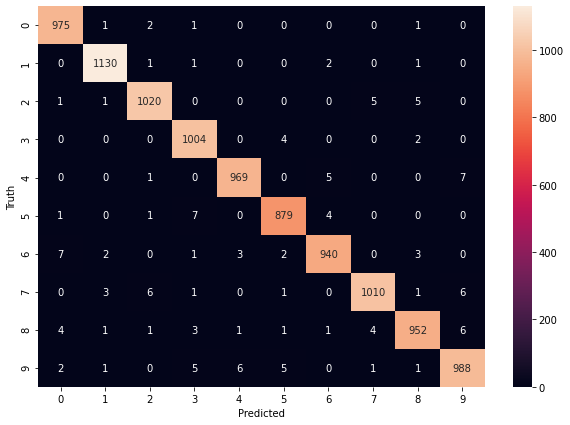

In [39]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_classes)

plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')